# Importing stuff

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
import mofr

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,mean_squared_error, mean_squared_log_error)
from xgboost import XGBClassifier, plot_tree
import math

import xgboost as xgb
import random

In [108]:
seed=1234

# Loading data

In [109]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [110]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


# Data exploration

In [113]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [114]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


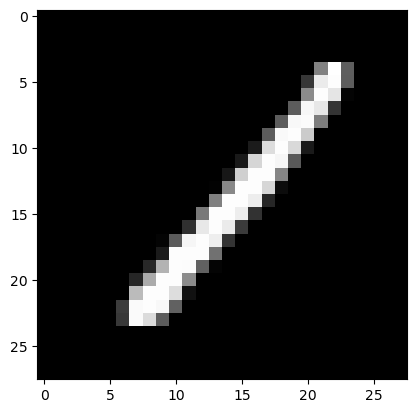

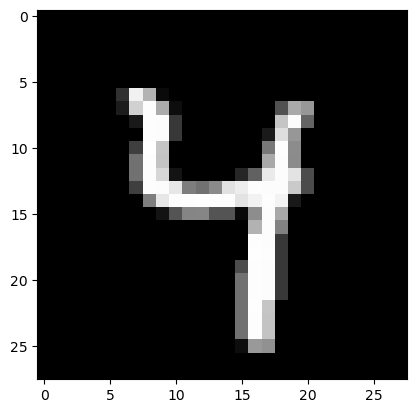

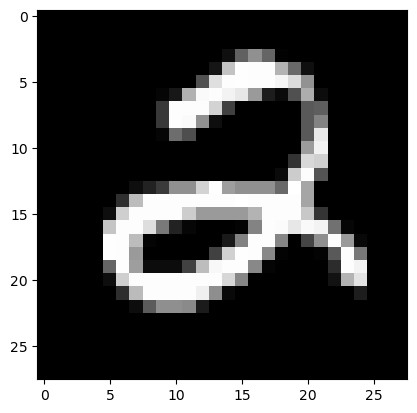

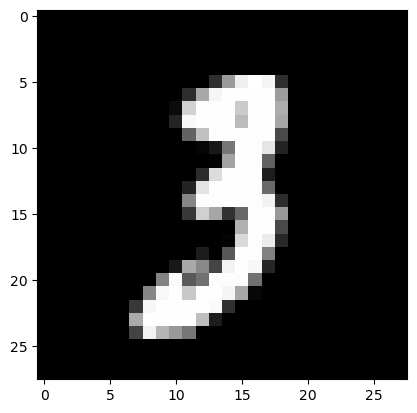

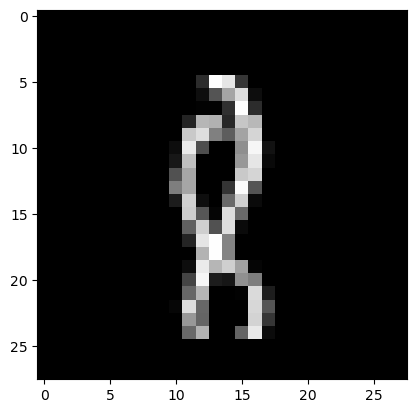

In [115]:
for i in range(5):
    n = random.randint(0,1000)

    pixels = np.array(test.iloc[n], dtype='float').reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# Fitting models

In [116]:
col_target='label'
col_preds=[col for col in train.select_dtypes(include=["int","float"]) if col!=col_target]

In [117]:
X_train, X_valid, y_train, y_valid= train_test_split(train, train[col_target], test_size=0.01, random_state=seed)

## XGBoost model

### Hyperopt

In [118]:
# from hyperopt import fmin, tpe, hp, anneal, Trials, STATUS_OK

In [119]:
# space={'max_depth': hp.quniform("max_depth", 3, 6, 1),
#         'gamma': hp.uniform ('gamma', 1,9),
#         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
#         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#         'n_estimators': 100,
#         'seed': 0
#     }

In [120]:
# def objective(space):
#     clf=xgb.XGBRegressor(
#                     n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                     reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
#                     colsample_bytree=int(space['colsample_bytree']))
    
#     evaluation = [( X_train[col_preds], y_train), ( X_valid[col_preds], y_valid)]
    
#     clf.fit(X_train[col_preds], y_train,
#             eval_set=evaluation, eval_metric="rmsle",
#             early_stopping_rounds=10,verbose=False)
    

#     pred = clf.predict(X_valid[col_preds])
#     mae = mean_absolute_error(y_valid, pred)
#     print ("SCORE:", mae)
#     return {'loss': -mae, 'status': STATUS_OK }

In [121]:
# trials = Trials()

# best_hyperparams = fmin(fn = objective,
#                         space = space,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

In [122]:
# best_hyperparams['max_depth']=int(best_hyperparams['max_depth'])
# best_hyperparams

### Training the model

In [123]:
# xgb_model = XGBClassifier(max_depth=3, seed=seed, colsample_bytree=0.5, gamma=1, min_child_weight=5, n_estimators=100)
# # xgb_model = XGBClassifier(**best_hyperparams)
# xgb_model.fit(X_train.loc[:, col_preds], X_train[col_target], verbose=0, eval_metric='logloss')


# train['PREDICTED_LABEL'] =xgb_model.predict(train[col_preds])
# X_train['PREDICTED_LABEL'] =xgb_model.predict(X_train[col_preds])
# X_valid['PREDICTED_LABEL'] = xgb_model.predict(X_valid[col_preds])
# test['PREDICTED_LABEL'] =xgb_model.predict(test[col_preds])

In [124]:
# print('The acc on the train set is: '+ str(np.mean((X_train[col_target]-X_train['PREDICTED_LABEL'])==0)))
# print('\n')
# print('The acc on the train set is: '+ str(np.mean((X_valid[col_target]-X_valid['PREDICTED_LABEL'])==0)))

In [125]:
# import os
# os.environ["PATH"] += os.pathsep + 'c:/Program Files/Graphviz/bin/'

# plt.rcParams["figure.figsize"] = (40,40)
# plot_tree(xgb_model)
# plt.show()

## NN model

In [126]:
from tensorflow import keras, argmax
from tensorflow.keras import layers, callbacks
from keras.utils.np_utils import to_categorical

In [127]:
# PREPARE DATA FOR NEURAL NETWORK
Y_train = X_train["label"]
X_train_nn = X_train.drop(labels = ["label"],axis = 1)
X_train_nn = X_train_nn / 255.0
X_train_nn = X_train_nn.values.reshape(-1,28,28,1)

Y_valid = X_valid["label"]
X_valid_nn = X_valid.drop(labels = ["label"],axis = 1)
X_valid_nn = X_valid_nn / 255.0
X_valid_nn = X_valid_nn.values.reshape(-1,28,28,1)


test_nn = test / 255.0
test_nn = test_nn.values.reshape(-1,28,28,1)

Y_train = to_categorical(Y_train, num_classes = 10)
Y_valid = to_categorical(Y_valid, num_classes = 10)

In [128]:


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    
#     layers.BatchNormalization(input_shape=[len(col_preds)]), #instead of preprocessing with sklearn
    layers.Conv2D(filters=32,kernel_size=5,activation='relu', 
            input_shape=(28,28,1)),
    layers.Flatten(),
    # the hidden ReLU layers
#     layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(), #instead of preprocessing with sklearn
    layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
#     layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    # the linear output layer 
    layers.Dense(units=10, activation='softmax'), #activation='sigmoid' for binary problems
])

In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               9437696   
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                      

In [130]:
model.compile(
loss='categorical_crossentropy', 
optimizer='adam', 
metrics=['accuracy']

)

In [131]:
history = model.fit(
    X_train_nn, Y_train,
    validation_data=(X_valid_nn, Y_valid),
    batch_size=100,
    callbacks=[early_stopping], # put your callbacks in a list
    epochs=2000,
    verbose=1, # suppress output since we'll plot the curves
)

Epoch 1/2000
416/416 [==============================] - 30s 71ms/step - loss: 0.2025 - accuracy: 0.9378 - val_loss: 0.0749 - val_accuracy: 0.9762
Epoch 2/2000
416/416 [==============================] - 28s 68ms/step - loss: 0.0809 - accuracy: 0.9746 - val_loss: 0.0623 - val_accuracy: 0.9881
Epoch 3/2000
416/416 [==============================] - 30s 71ms/step - loss: 0.0535 - accuracy: 0.9826 - val_loss: 0.0706 - val_accuracy: 0.9738
Epoch 4/2000
416/416 [==============================] - 30s 72ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0628 - val_accuracy: 0.9833
Epoch 5/2000
416/416 [==============================] - 30s 71ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0505 - val_accuracy: 0.9810
Epoch 6/2000
416/416 [==============================] - 30s 71ms/step - loss: 0.0327 - accuracy: 0.9891 - val_loss: 0.0537 - val_accuracy: 0.9810
Epoch 7/2000
416/416 [==============================] - 30s 72ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0595 -

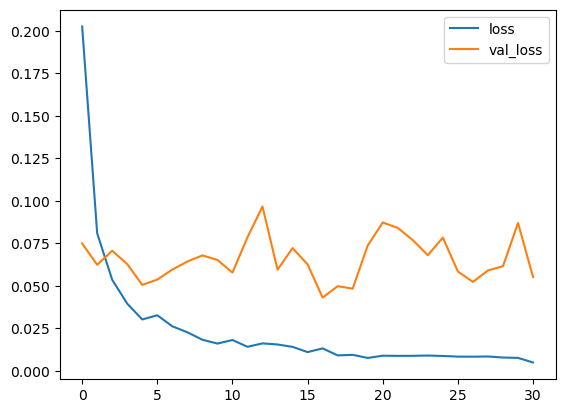

Minimum validation loss: 0.04304611682891846


In [132]:
#Validation loss develoment
history_df = pd.DataFrame(history.history)[0:-1]
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [133]:
X_train['NN_PREDICTION']= [np.argmax(x) for x in model.predict(X_train_nn)]
X_valid['NN_PREDICTION']= [np.argmax(x) for x in model.predict(X_valid_nn)]
train['NN_PREDICTION']= [np.argmax(x) for x in model.predict((train[col_preds]/255.0).values.reshape(-1,28,28,1))]
test['NN_PREDICTION']= [np.argmax(x) for x in model.predict((test[col_preds]/255.0).values.reshape(-1,28,28,1))]

875/875 [==============================] - 6s 7ms/step


In [134]:
print('The acc on the train set is: '+ str(np.mean((X_train[col_target]-X_train['NN_PREDICTION'])==0)))
print('\n')
print('The acc on the train set is: '+ str(np.mean((X_valid[col_target]-X_valid['NN_PREDICTION'])==0)))

The acc on the train set is: 0.9996151996151996


The acc on the train set is: 0.9880952380952381


# Submission file

In [135]:
# test['Label']=xgb_model.predict(test[col_preds])
test['Label']=test['NN_PREDICTION']
test['ImageId']=test.index+1

In [136]:
test[['ImageId', 'Label']].to_csv('submission.csv', index=False)